In [1]:
# A simple neural network to detect handwritten digits using the lenet 5 architecture.
# The tensorflow library will be used to create the network.

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

x_train shape : (45000, 28, 28)
y_train shape : (45000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)



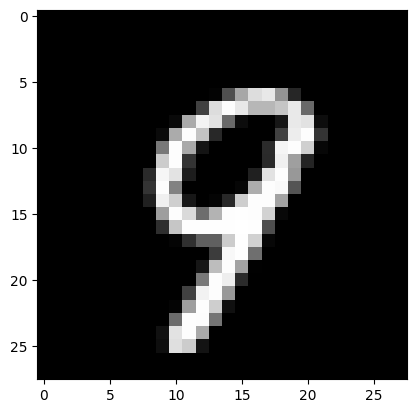

y_train : 9


In [18]:
# Load the data using keras.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

print("y_train : {}".format(y_train[0]))

In [4]:
tf.keras.layers.Conv2D?

Init signature:
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers or `None`, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB picture

In [8]:
# Create the network using keras.
# Linet 5 architecture : Input, Convolution, Maxpooling, convolution, maxpolling, Fully connected, fully connected, fullyconnected (output)
# Layer 1> 6 filter of size 5x5
# Layer 2> Maxpooling of size 2x2
# Layer 3> Convolution (16), filter size 5x5
# Layer 4> Maxpooling of size 2x2
# Layer 5> Dense Full connected (120) nodes.
# Layer 6> Same as before, with 84 nodes.
# Layer 7> Final, 10 nodes in dense layer.

linet_5_model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(28,28,1)),  
     tf.keras.layers.Conv2D(6, 5, activation='relu'),
     tf.keras.layers.MaxPooling2D(2),
     tf.keras.layers.Conv2D(16, 5, activation='relu'),
     tf.keras.layers.MaxPooling2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(120, activation='relu'),
     tf.keras.layers.Dense(84, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
])

linet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [17]:
linet_5_model.fit?

Signature:
linet_5_model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, 

In [19]:

# Compile the network.
linet_5_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
linet_5_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 17s 11ms/step - loss: 0.0281 - accuracy: 0.9921 - val_loss: 0.0628 - val_accuracy: 0.9856
Epoch 2/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0268 - accuracy: 0.9927 - val_loss: 0.0453 - val_accuracy: 0.9896
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 4/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0253 - accuracy: 0.9932 - val_loss: 0.0420 - val_accuracy: 0.9908
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0238 - accuracy: 0.9939 - val_loss: 0.0414 - val_accuracy: 0.9905
Epoch 6/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0230 - accuracy: 0.9941 - val_loss: 0.0525 - val_accuracy: 0.9888
Epoch 7/10
1407/1407 [==============================] - 15s 10ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.0536 -

In [23]:
# Evaluation performance of network.
test_loss, test_acc = linet_5_model.evaluate(x_test, y_test)
print('Accuracy : {}'.format(test_acc * 100.0))
print('Loss : {}'.format(test_loss))


313/313 [==============================] - 2s 7ms/step - loss: 0.0712 - accuracy: 0.9853
Accuracy : 98.53000044822693
Loss : 0.07122769951820374
